In [53]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval (x) if pd.notna (x) else x)

In [54]:
df_US= df[df['job_country']=='United States']

In [55]:
df_skills= df_US.explode('job_skills')

df_skills[['job_title','job_skills']]

df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,r,"{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


In [16]:
df_skills_count= df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count= df_skills_count.reset_index(name= 'skill_count')

df_skills_count.sort_values(by='skill_count',ascending=False, inplace= True)

df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [56]:
job_titles= df_skills_count['job_title_short'].unique().tolist()

job_titles= sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

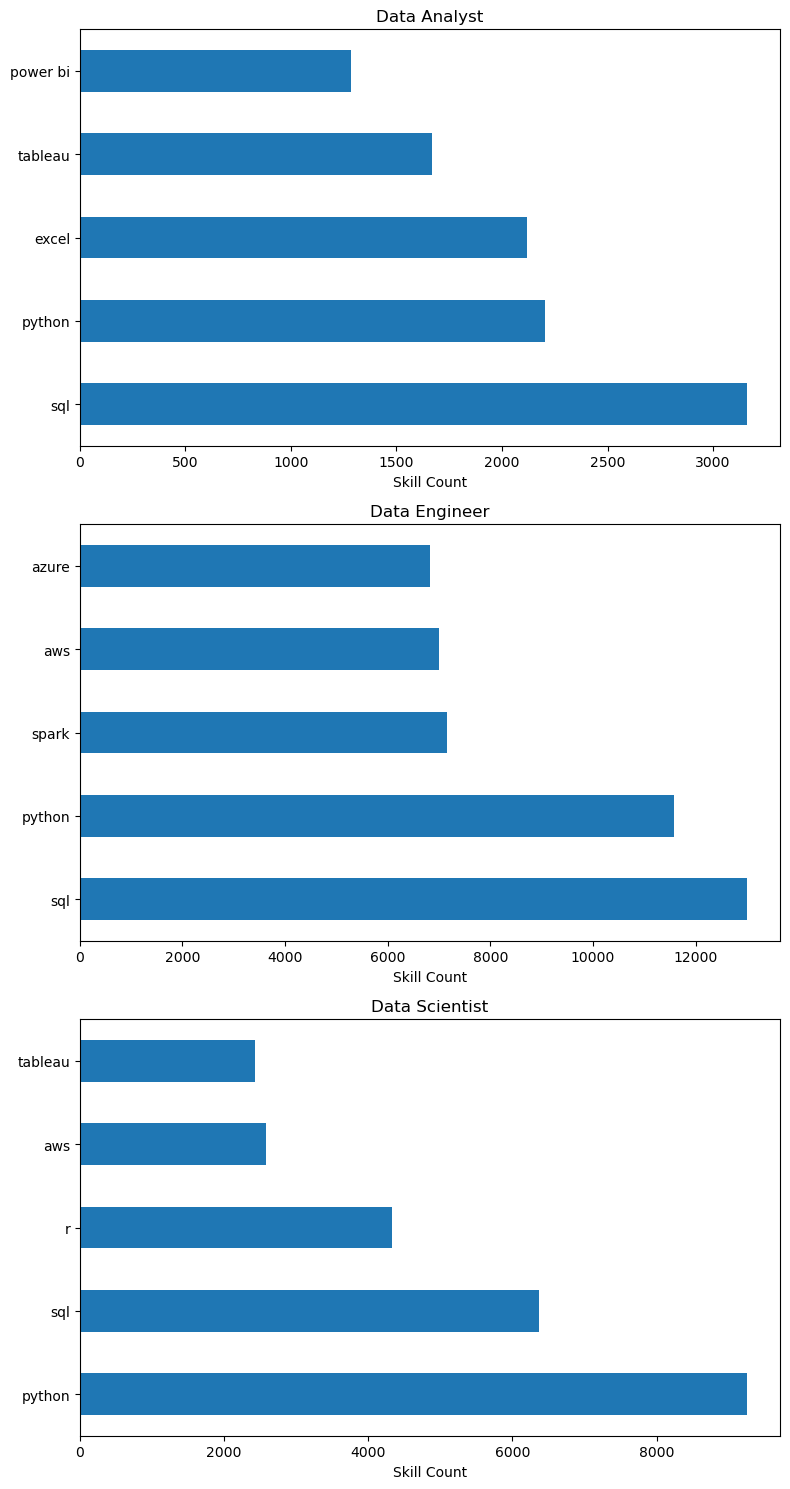

In [57]:

job_titles = sorted(df_skills_count['job_title_short'].unique().tolist()[:3])

fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 5 * len(job_titles)))  # stacked vertically


if len(job_titles) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False, title=job_title)
    ax[i].set_xlabel("Skill Count")
    ax[i].set_ylabel("")

plt.tight_layout()
plt.show()


In [37]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [40]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count, how='left', on='job_title_short')

In [60]:
df_skills_perc['skills_percent']=100* df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,sql,Data Engineer,12993,35080,37.038198
1,python,Data Engineer,11568,35080,32.976055
2,python,Data Scientist,9248,58830,15.719871
3,spark,Data Engineer,7157,35080,20.401938
4,aws,Data Engineer,6993,35080,19.934436
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,58830,0.001700
1685,node.js,Senior Data Analyst,1,11791,0.008481
1686,matlab,Cloud Engineer,1,423,0.236407
1687,fastapi,Cloud Engineer,1,423,0.236407


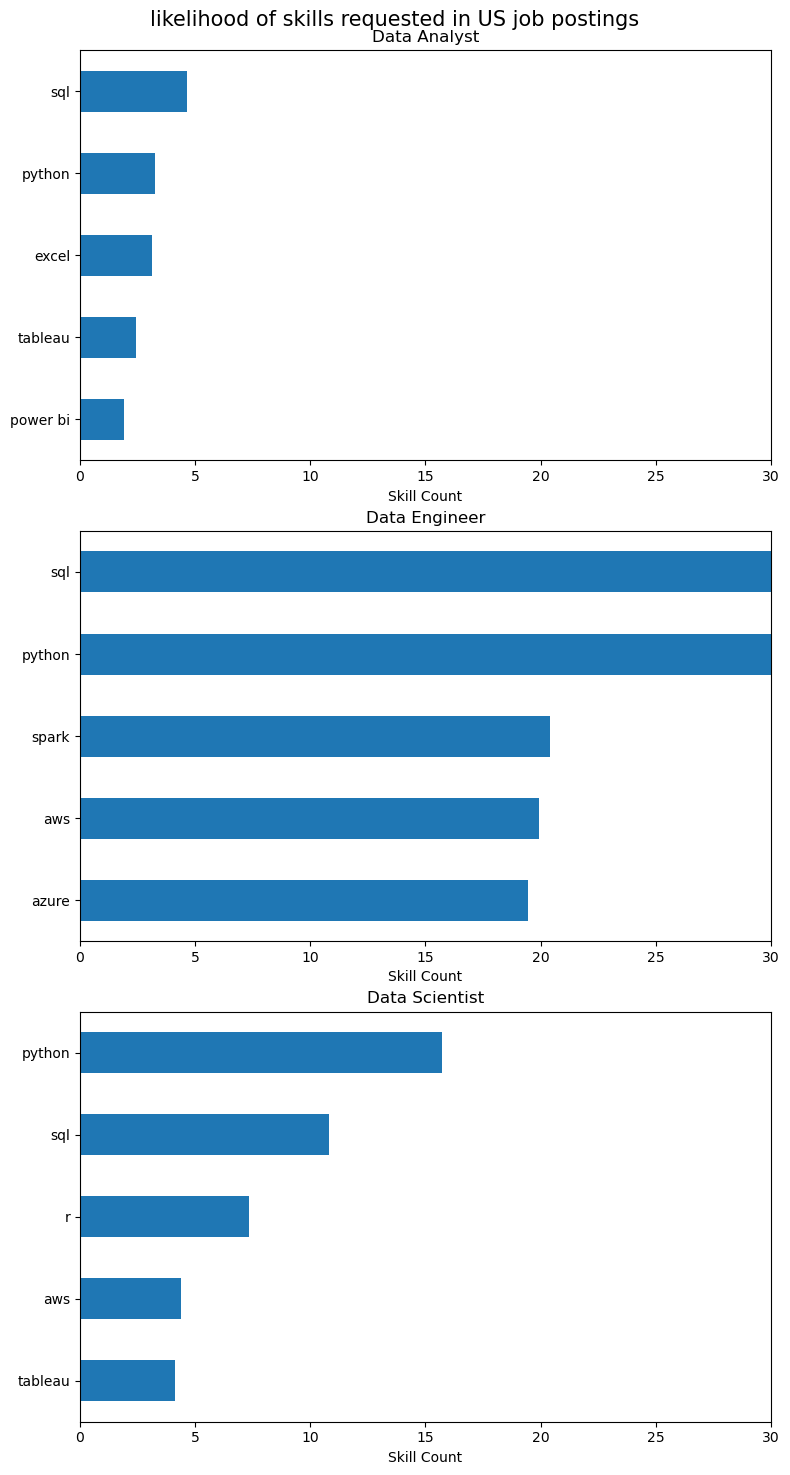

In [63]:

job_titles = sorted(df_skills_count['job_title_short'].unique().tolist()[:3])

fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 5 * len(job_titles)))  # stacked vertically


if len(job_titles) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skills_percent', ax=ax[i], legend=False, title=job_title)
    ax[i].set_xlabel("Skill Count")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0,30)
    ax[i].invert_yaxis()

fig.suptitle('likelihood of skills requested in US job postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()
